# Binary mask refinement
A typical post-processing step after thresholding is refining binary masks. This step can be crucial to smooth outlines around segmented objects, remove single pixels which were segmented as positive and for filling black holes in white regions.

See also
* [Closing](https://en.wikipedia.org/wiki/Closing_(morphology))

We start with the segmented `embryos_grey.jpg`

Text(0.5, 1.0, 'Threshold')

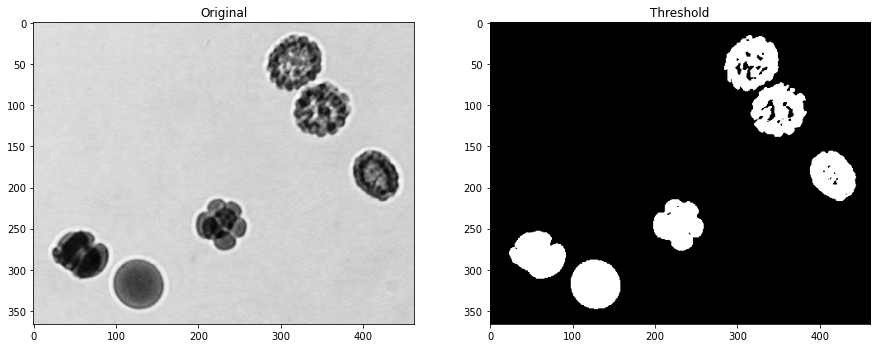

In [45]:
from skimage.io import imread, imshow
image = imread("../data/embryos_grey.jpg")

from skimage import filters
threshold = filters.threshold_otsu(image)
binary_image = image <= threshold

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(image, cmap='Greys_r')
axs[0].set_title('Original')

axs[1].imshow(binary_image, cmap='Greys_r')
axs[1].set_title('Threshold')

## Binary erosion
[Binary erosion](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.binary_erosion) turns white pixels black which have a black neighboring pixel. The neighborhood is defined by a [structuring element](https://scikit-image.org/docs/stable/auto_examples/numpy_operations/plot_structuring_elements.html). Thus, coastlines of the islands are eroded.

Text(0.5, 1.0, 'Eroded r=4')

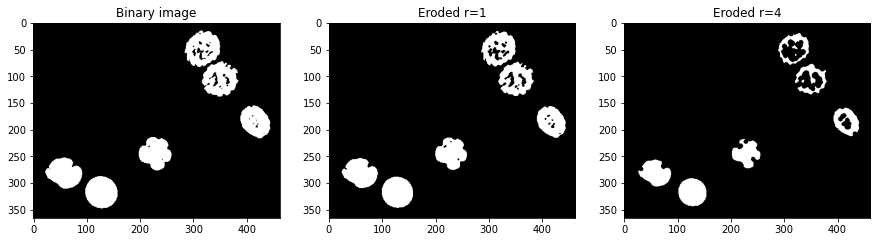

In [49]:
from skimage.morphology import disk, binary_erosion
eroded1 = binary_erosion(binary_image, disk(1))
eroded4 = binary_erosion(binary_image, disk(4))

fig, axs = plt.subplots(1, 3, figsize=(15,15))
axs[0].imshow(binary_image, cmap='Greys_r')
axs[0].set_title('Binary image')

axs[1].imshow(eroded1, cmap='Greys_r')
axs[1].set_title('Eroded r=1')

axs[2].imshow(eroded4, cmap='Greys_r')
axs[2].set_title('Eroded r=4')

## Binary dilation
Analogously, dilation turns black pixels white which have a white neighbor.

Text(0.5, 1.0, 'Dilated r=4')

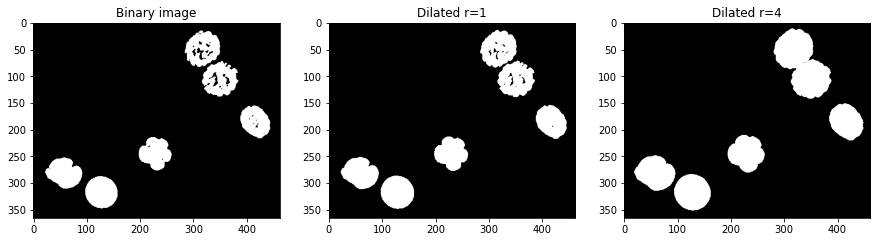

In [50]:
from skimage.morphology import disk, binary_dilation
dilated1 = binary_dilation(binary_image, disk(1))
dilated4 = binary_dilation(binary_image, disk(4))

fig, axs = plt.subplots(1, 3, figsize=(15,15))
axs[0].imshow(binary_image, cmap='Greys_r')
axs[0].set_title('Binary image')

axs[1].imshow(dilated1, cmap='Greys_r')
axs[1].set_title('Dilated r=1')

axs[2].imshow(dilated4, cmap='Greys_r')
axs[2].set_title('Dilated r=4')

## Fill holes
Another important operation is [fill holes](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.morphology.binary_fill_holes.html) which is part of the scipy package.

Text(0.5, 1.0, 'Holes filled')

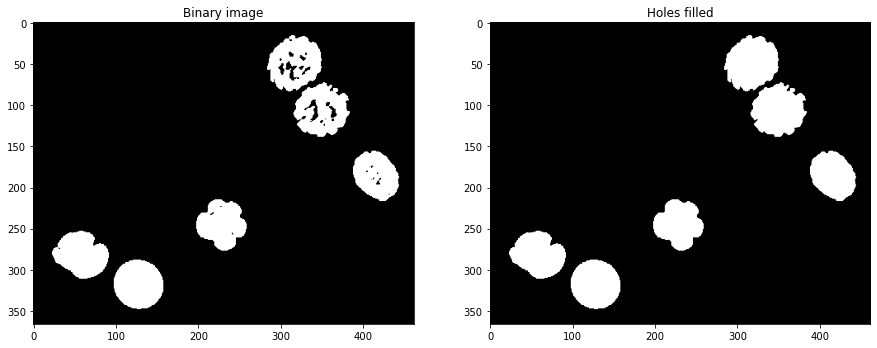

In [52]:
import numpy as np
from scipy.ndimage import binary_fill_holes

filled = binary_fill_holes(binary_image)

fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(binary_image, cmap='Greys_r')
axs[0].set_title('Binary image')

axs[1].imshow(filled, cmap='Greys_r')
axs[1].set_title('Holes filled')

## Binary closing and opening
By combining operations such as erosion and dilation subsequently, one can close and open binary images.

Text(0.5, 1.0, 'Closed')

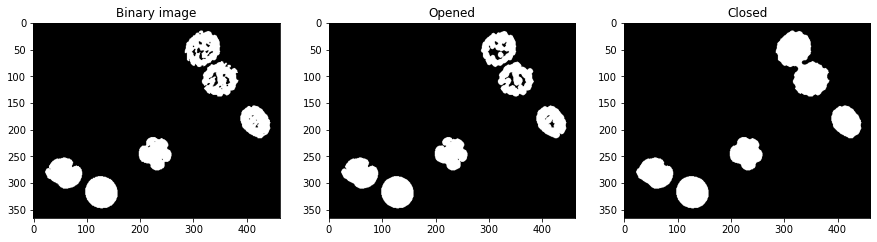

In [56]:
import numpy as np
from skimage.morphology import binary_opening, binary_closing

opened = binary_opening(binary_image, disk(4))
closed = binary_closing(binary_image, disk(4))

fig, axs = plt.subplots(1, 3, figsize=(15,15))
axs[0].imshow(binary_image, cmap='Greys_r')
axs[0].set_title('Binary image')

axs[1].imshow(opened, cmap='Greys_r')
axs[1].set_title('Opened')

axs[2].imshow(closed, cmap='Greys_r')
axs[2].set_title('Closed')

## Comparing binary images
For better visualization of differenced between binary images, use the [XOR `^`](https://en.wikipedia.org/wiki/XOR_gate) operator. It turns all pixels white where one of the two images was white but not the other.

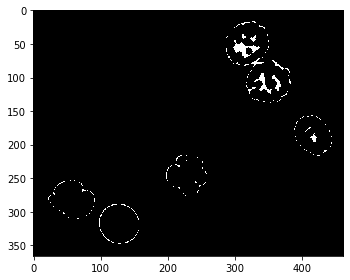

In [70]:
imshow(opened ^ binary_image)

## Exercise
In the following code example, `embryos_grey.jpg` is processed using Gaussian filtering and Otsu-thresholding. Process the same `image` only using Otsu-thresholding and binary post-processing operations. Can you achieve the same binary image?

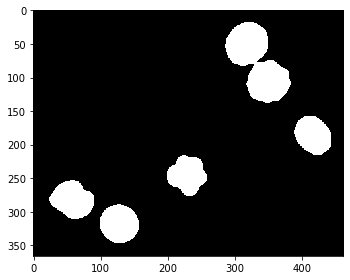

In [71]:
from skimage.io import imread, imshow
image = imread("../data/embryos_grey.jpg")

from skimage import filters

# noise removal
blurred = filters.gaussian(image, sigma=4)

# thresholding
threshold = filters.threshold_otsu(blurred)
binary_image = blurred <= threshold

imshow(binary_image, vmin=0, vmax=1)